<a href="https://colab.research.google.com/github/AishwaryaKumari/Hotel-Booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### **'Knowledge has a beginning but no end.'**
This quote belongs to Geeta iyengar. Geeta Iyengar was the eldest daughter of the founder of the worldwide Iyengar yoga method, Yogacharya B. K. S. Iyengar, was described as "the world's leading female yoga teacher". (source : https://en.wikipedia.org/wiki/Geeta_Iyengar#Life_and_work)

As this above quote states gaining knowledge is just the beginning of a new journey not the end. Gaining knowledge about new things leads to a beautiful destination. Learning about the data is the most difficult task in the data science as well as time consuming.

So I tried to learn firstly about examining the data provided. Based on the book 'Multivariate data analysis' (source : https://amzn.to/2JuDmvo) , which contains a chapter 'Examine your data', I did my best to follow a comprehensive, but not exhaustive analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

  

In [58]:
# invite friends to kaggle party
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [59]:
# attach files to the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#loading the file
hotel_df = pd.read_csv('/content/drive/MyDrive/Hotel Booking CP1/Hotel Bookings.csv')

In [61]:
#checking the file type
type(hotel_df)

pandas.core.frame.DataFrame

First of all before visiting the hotel or before booking it, we need to check for the availability, accomodations, compare prices, hotel location, vehicle parking places, hotel reviews, payment policies, additional taxes and fees, and additional amenities.

Lets check for these things before booking hotel.
 

In [62]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In this we can see that this dataset contains 5 rows and 32 columns among which is_canceled, stays_in_weekend_nights, stays_in_week_nights, days_in_waiting_list, required_car_parking_spaces, and total_of_special_requests have null values. These null values indicates about no availability of the things at that particular time.

In [63]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [64]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The above result shows how many non-null counts are present in 32 columns and 119390 rows.  It also shows different types of column like :- integer, float,and object.

In [65]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

This shows that there are 32 different columns with their names.

In [66]:
#different types of hotels available
hotel_df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Around 79330 number of city hotel bookings and 40060 number of resort hotel bookings took place.

In [67]:
#canceled hotels
hotel_df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [68]:
hotel_df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

This shows that in 2016 there was maximum number of customers arrived in hotel.

In [69]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


The above result shows that out of 32 columns children, company, agent and  country have null values.

Checking for all the unique values attained by each column whose meanings are difficult to understand.

In [70]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [71]:
hotel_df['is_canceled'].unique()

array([0, 1])

In [72]:
hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [73]:
hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [74]:
hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [75]:
hotel_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [76]:
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

## **Cleaning the data**
Cleaning the data is the crucial step before performing the EDA as it removes the unwanted data which can affect the outcome of EDA.

While cleaning the data I will perform different steps :- 1. Removing duplicate rows, 2. Handling the missing values in dataset, 3. Converting columns to appropriate dataset, 4. Adding important columns.

### 1. Removing duplicate rows

In [77]:
#Showing the number of duplicate rows
hotel_df[hotel_df.duplicated()].shape   

(31994, 32)

In [78]:
#Checking duplicate values
hotel_df.drop_duplicates(inplace = True)

In [79]:
hotel_df.shape

(87396, 32)

### 2. Handling the missing values in dataset

In [80]:
# Columns containing missing values.
hotel_df.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Company and agent columns contains their respective numbers. There may be chances of customer not booking the hotel via company or some agent, so in that case case values can be null under these situations. The null values will be replaced by 0 in these columns.

In [81]:
hotel_df[['company','agent']] = hotel_df[['company','agent']].fillna(0)

In [82]:
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

The children column shows 0 as a value which means there were no children present in group of customers who made the transaction. It also showa that nan values are the missing values due to error in recording the data. So I will be replacing the null values with mean value of children.

In [83]:
hotel_df['children'].fillna(hotel_df['children'].mean(), inplace = True)

Next column which has null value is 'country'. This column indicates the country from where customers belong. As this column is a string type of 
dataset the missing values can be repleced with the mode of this column.

In [84]:
hotel_df['country'].fillna('others', inplace = True)

In [85]:
# Checking if all null values are removed
hotel_df.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [86]:
hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] == 0].shape

(166, 32)

In [87]:
hotel_df.drop(hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] == 0].index, inplace = True)

### 3. Converting columns to appropriate dataset

In [88]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

In [89]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')

### 4.  Adding important columns

In [90]:
# Adding total staying days in hotels
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']

This column has been added so that we can analyze the stay length of customers in hotel.

## **EDA ( exploratory data analysis)**

In [91]:
num_hotel_df = hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

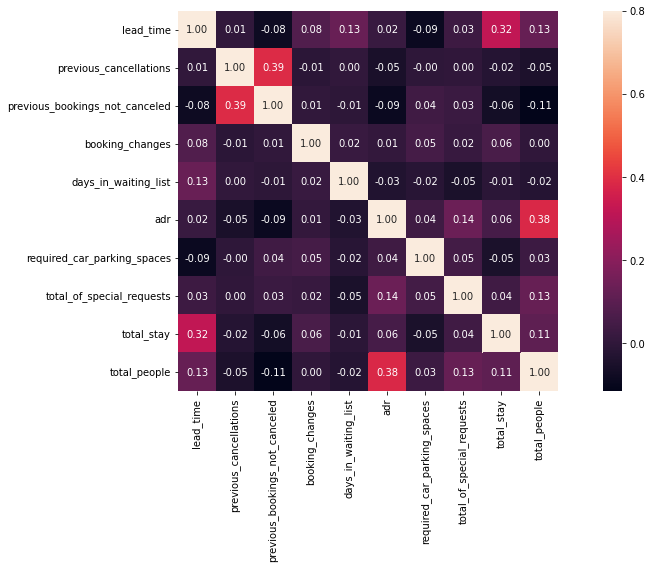

In [92]:
#correlation matrix
corrmat = num_hotel_df.corr()
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

Total stay length and lead time have slight correlation. This means that for longer hotel stays people generally plans just little before the actual arrival to the hotel.

Adr is slightly correlated with total people, which shows that as more number of people means more revenue and therefore more adr.

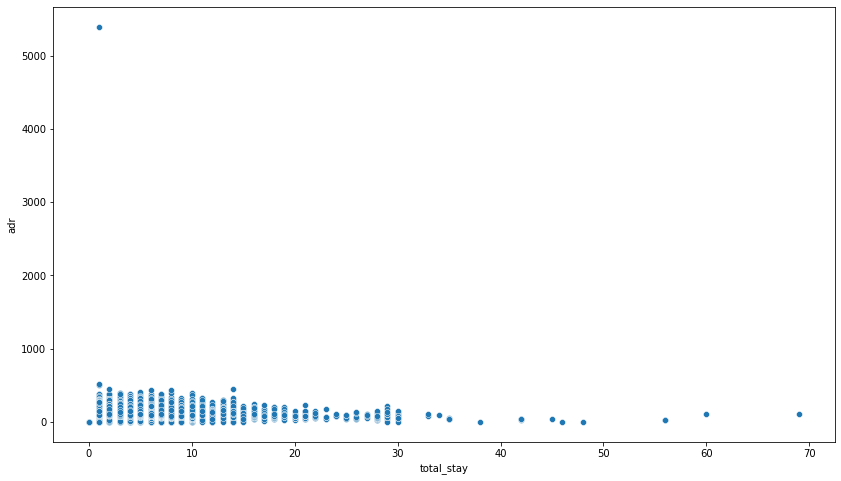

In [93]:
plt.figure(figsize = (14,8))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df)
plt.show()

we can see that there is an outlier which we will remove for better scatter plot.

In [94]:
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)

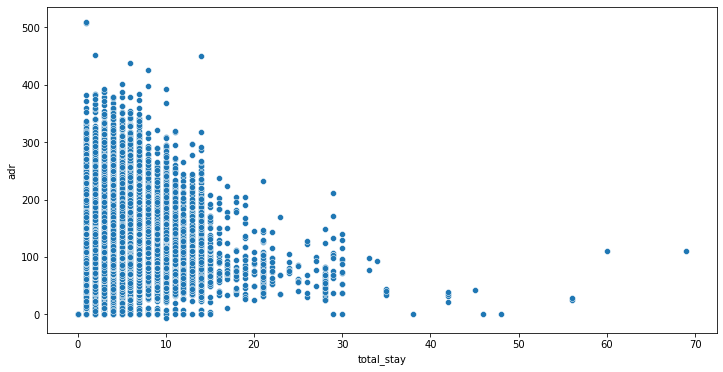

In [95]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df)
plt.show()

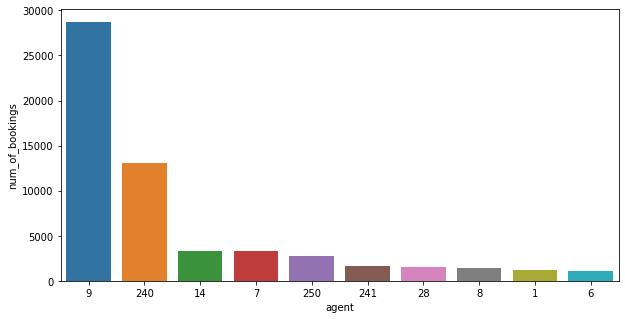

In [96]:
d1 = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            
# 0 represents that booking is not made by an agent
# Selecting top 10 performing agents
d1 = d1[:10] 
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

The agent 9 has made most of the hotel bookings.

Most demanded room type and room type  of highest generating adr

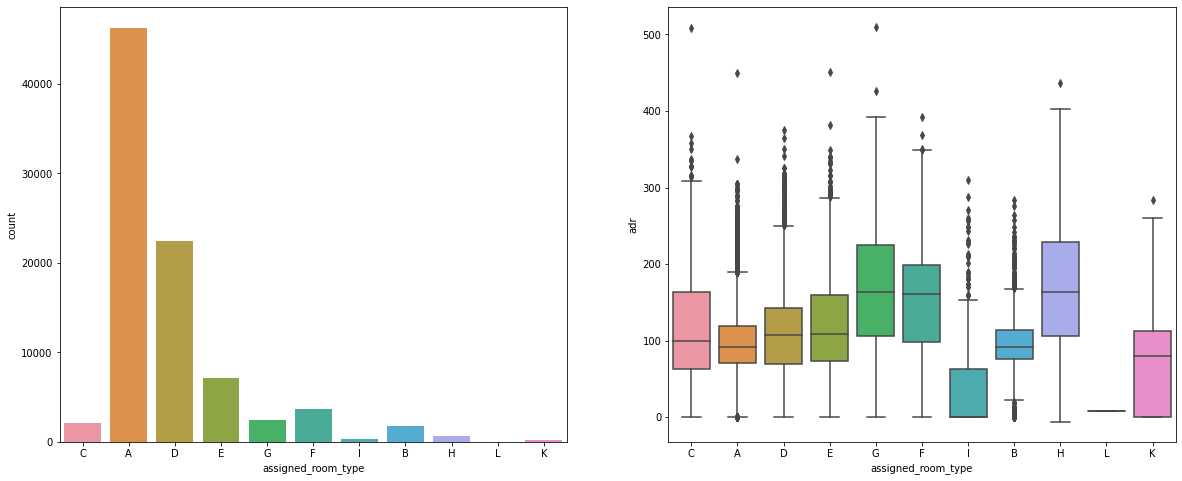

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

grp_by_room = hotel_df.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hotel_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = hotel_df['assigned_room_type'], y = hotel_df['adr'])
plt.show()

Most demanded room type is A but better adr rooms are H, G and C. Hotels should increase the number of room types A and H to maximize the revenue.

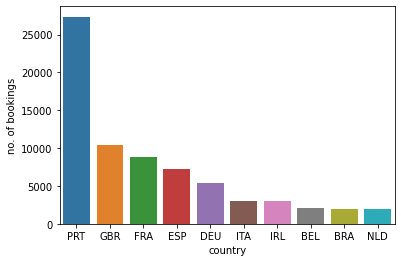

In [98]:
grp_by_country = hotel_df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

Most of the customers come from Portugal, Great Britain, France and Spain.

### 1) Hotel wise analysis

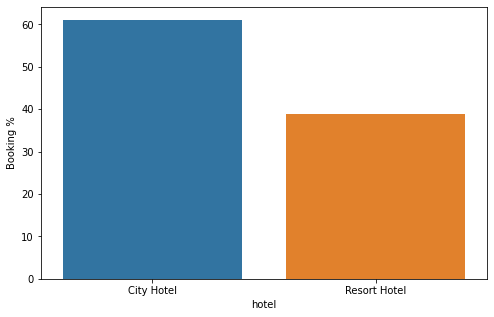

In [99]:
grouped_by_hotel = hotel_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

It shows around 60% of hotel booking is for city hotel and almost 40% for resort hotel.

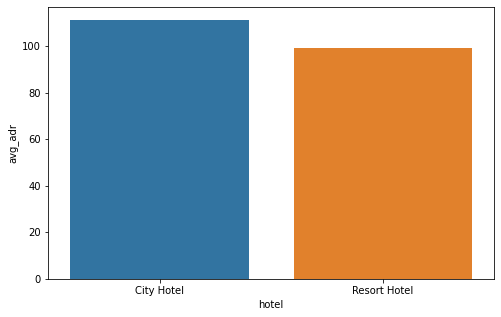

In [100]:
# Which hotel is making more revenue?
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

It clearly shows that City hotel makes more revenue than the Resort hotel.

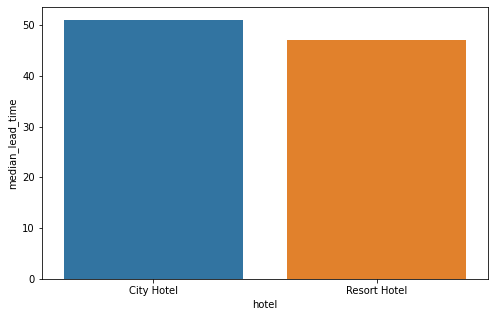

In [101]:
# Which hotel has higher lead time?
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this shows that customers generally plans their hotel booking was too early.

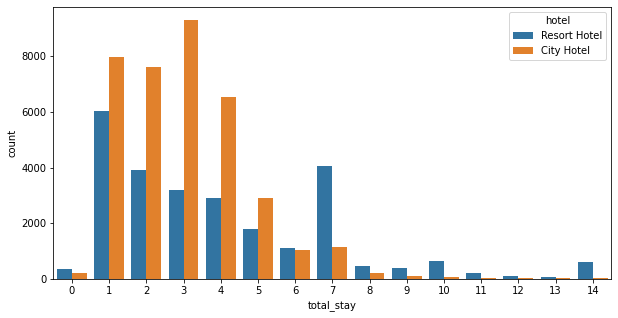

In [102]:
# How long people stay in hotel?
not_canceled = hotel_df[hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

It shows that most commonly stay length is less than 4 days and generally people prefer City hotel for short stays and Resort hotel for longer stays.

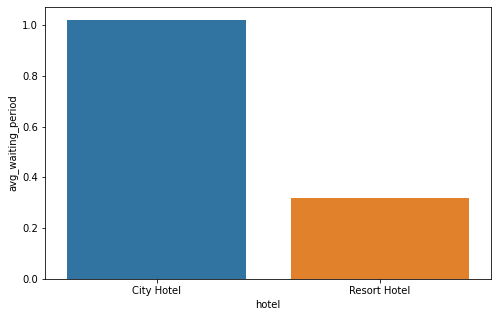

In [103]:
# How long is waiting time?
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City hotel has longer waiting time than Resort hotel, which also shows that City hotel is more busier than the other.

In [104]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hotel_df[hotel_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hotel_df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


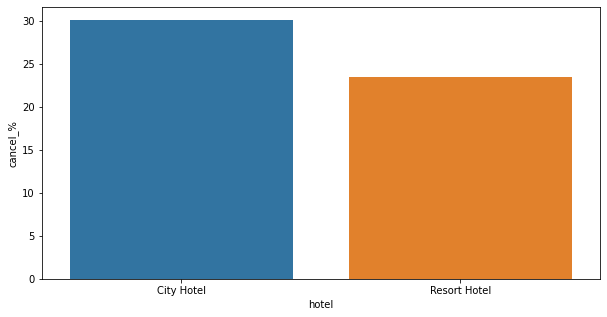

In [105]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

City hotel booking gets cancelled mostly than the Resort hotel, which is around 20-30% of total bookings.

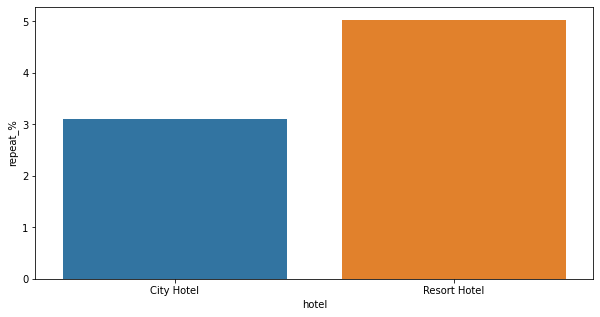

In [106]:
# Selecting and counting repeated customers bookings
repeated_data = hotel_df[hotel_df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Resort hotel has slightly higher chances of customers repeat % than the City hotel.

### 2) Distribution channel wise analysis 

Lets check which channel brings most number of hotel bookings.

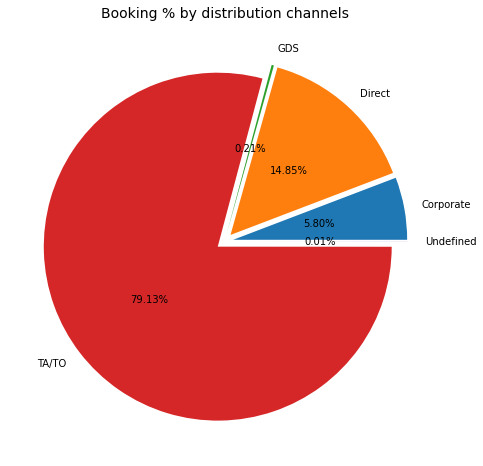

In [107]:
#most common channel for booking hotel
group_by_dc = hotel_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/hotel_df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

TA/TO is the common channel for booking hotel with almost 81.98%.

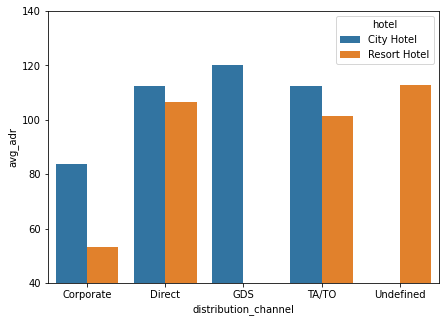

In [108]:
#Distribution channel bringing better revenue generating deals for hotel 
group_by_dc_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revenue generating deals by direct and TA/TO channel. 
Resort Hotel need to increase outreach on GDS channel to increase revenue.

### 3) Booking cancellation analysis

Lets try to understand what is the reason behind cancelling of hotel bookings. 

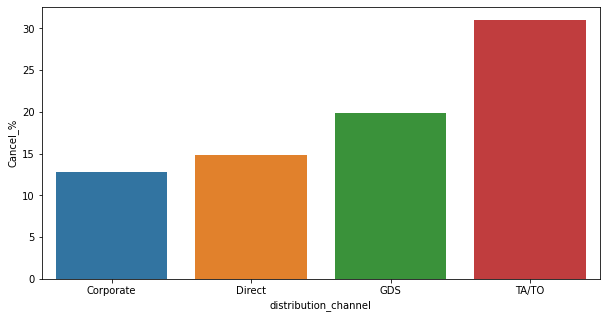

In [109]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled or more chances.

Let us see what causes the cancellation of bookings of rooms by customers. One question can arise that may be longer waiting period or longer lead time causes the cancellation of hotel bookings.

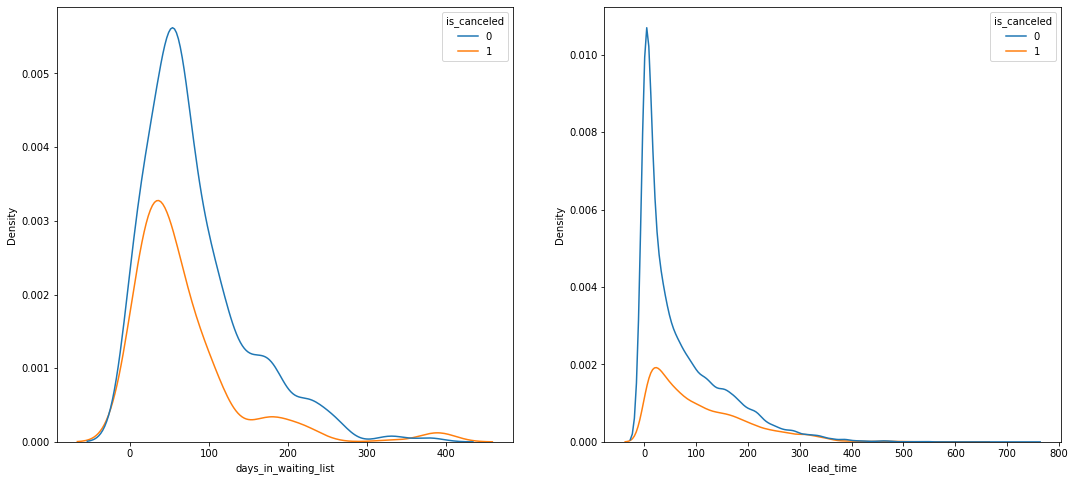

In [110]:
waiting_bookings = hotel_df[hotel_df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = hotel_df['lead_time'], hue = hotel_df['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of less than 150 days but also most of the bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. Also, lead time has no affect on cancellation of bookings, as both curves of cancellation and not cancellation are similar for lead time too.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation for hotel booking.

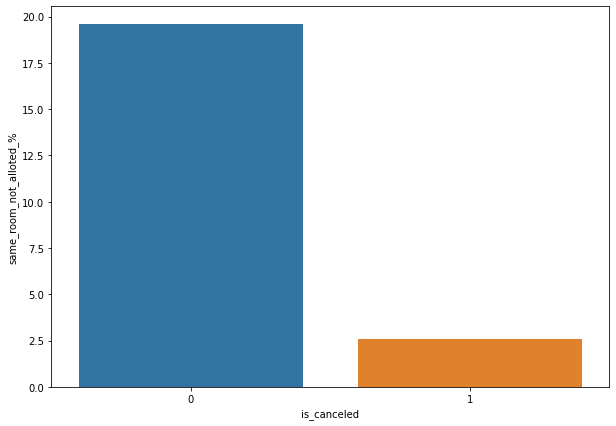

In [111]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

hotel_df['same_room_not_alloted'] = hotel_df.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = hotel_df.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

Lets see  if not getting the same room affects the adr or not.

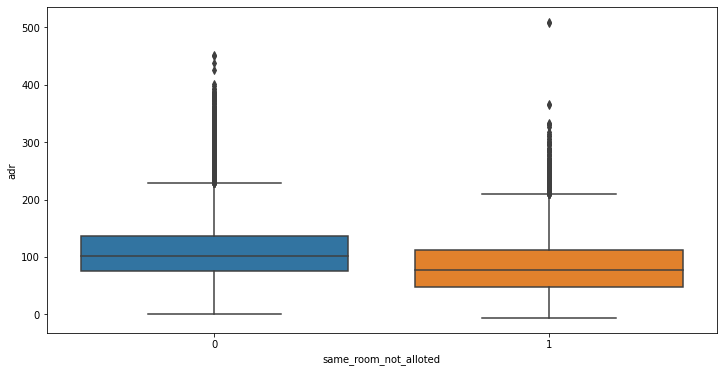

In [112]:
plt.figure(figsize = (12,6))
sns.boxplot(x ='same_room_not_alloted', y ='adr', data = hotel_df)
plt.show()

So not getting the same room do affects the adr. People who didn't get the same room have paid a little lower adr, except few exceptions.

### 4) Time wise analysis

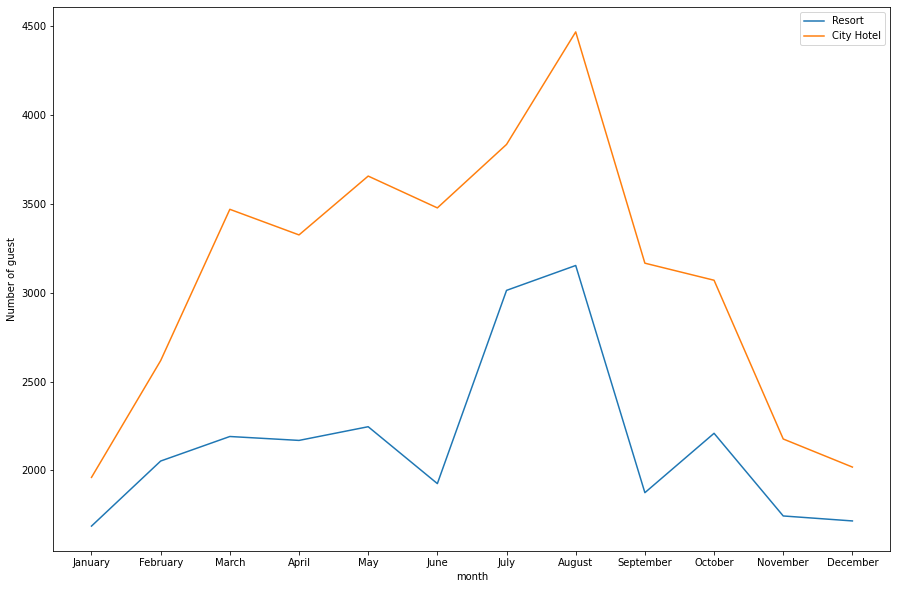

In [113]:
#Which are the most busy months?
d_month = hotel_df['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
data_city = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

Most number of guest comes in the month of August.

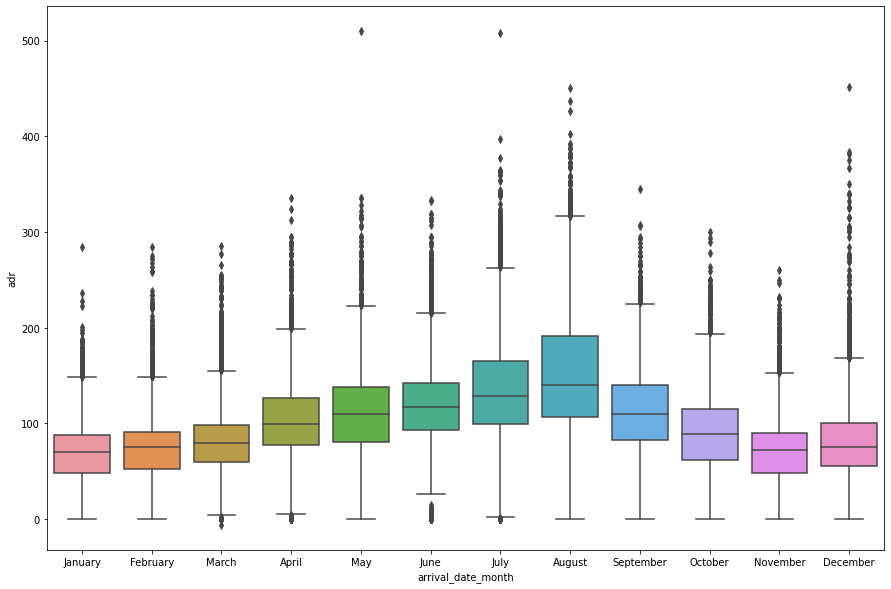

In [114]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,10))
sns.boxplot(x = hotel_df['arrival_date_month'],y = hotel_df['adr'])
plt.show()

Average adr rises from beginning of year upto middle of the year and reaches the peak at August and then lowers to the end of the year. But hotels do make some good deals with high adr at end of the year also.

## **Summary**

In this project I received one csv file as an input that is Hotel Bookings.csv. I chose this project because nowadays there are people travelling a lot. So for travelling, hotel booking is their first priority as it is the most important part of travelling and it needs to be done previously with all the details. While booking the hotel, generally people search for availability, sanity, comparing prices with other hotels, hotel location, vehicle parking places, hotel reviews, payment policies, and their food menu. I had little idea about what to do with the csv file, later I took the help of some class videos and study materials. With the reference of the study materials I started using it in this project for analyzing smaller things from the csv file like mounting the drive, finding head and tail of the file which by default gives the first 5 rows and last 5 rows of the csv file. Then I searched for columns which showed 32 different columns in the csv file. Later I analyzed the unique characters present in it. Then I started analyzing for much bigger datasets like cleaning the data by removing duplicate rows from the file, handling the missing values in the dataset, converting the columns to their appropriate dataset and adding some important columns.

Some of my key findings were: Among two different hotels, a city hotel receives a higher number of bookings with high revenue than the resort hotel but it has also faced a lot of booking cancellation. About the distribution channels, TA/TO channel does a higher number of hotel bookings than other channels. TA/TO channel also faces the most number of hotel booking cancellations. Most number of guest arrivals in which month of the year and the reason behind the hotel bookings cancellation.

## **Conclusion**

1) The City hotel receives more hotel bookings than the Resort hotel.

2) People choose the TA/TO channel mostly for booking hotels and for cancelling as well.

3) Most demanded room type and better adr rooms so that hotels can increase the number of particular room types and maximize the revenue.

4) Resort hotels have more chances of customers repeating the same hotel on their next arrival.

5) Resort hotels have more revenue generating deals by direct and TA/TO channel. It needs to increase its outreach on the GDS channel to increase revenue.

6) Most guests arrive during the month of August in both the Hotels.